<a href="https://colab.research.google.com/github/MoreKajal/Facial-Expression-Recognition-Using-Python-TensorFlow-2.0/blob/main/CK%2BFER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras

from keras.utils import np_utils
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
import os
print(os.listdir("/content/drive/MyDrive/M.Tech Projects/Facial Expression Project/CK+ Kaggle/"))


# Any results you write to the current directory are saved as output.

['CK+NewDataset', 'CK+FER.ipynb', 'ck']


In [18]:
data_path = '/content/drive/MyDrive/M.Tech Projects/Facial Expression Project/CK+ Kaggle/CK+NewDataset'
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)     #img arrays
img_data = img_data.astype('float32')  #img arrays converted to float value arrays
img_data = img_data/255                #Normalize the array
img_data.shape
print("What is the shape of img array created-->", img_data.shape)
#print("Whats here-->", img_data.shape)       

Loaded the images of dataset-sadness

Loaded the images of dataset-disgust

Loaded the images of dataset-fear

Loaded the images of dataset-anger

Loaded the images of dataset-happy

Loaded the images of dataset-contempt

Loaded the images of dataset-surprise

What is the shape of img array created--> (70, 48, 48, 3)


In [21]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:9]=0 #10
labels[10:19]=1 #10
labels[20:29]=2 #10
labels[30:39]=3 #10
labels[40:49]=4 #10
labels[50:59]=5 #10
labels[60:69]=6 #10

names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

def getLabel(id):
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

print("Done")

Done


In [23]:
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)
x_test=X_test
print("Done")

Done


In [25]:
input_shape=(48,48,3)

model = Sequential()
model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
print("Done")

Done


In [26]:
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable
print("Done")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 6)         456       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 16)        2416      
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)        9280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)         

In [27]:
from keras import callbacks
filename='model_train_new.csv'
filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

csv_log=callbacks.CSVLogger(filename, separator=',', append=False)
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [csv_log,checkpoint]
callbacks_list = [csv_log]
print("Done")

Done


In [37]:
hist = model.fit(X_train, y_train, batch_size=7, epochs=50, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

Epoch 1/50
9/9 [==============================] - 0s 13ms/step - loss: 0.2760 - accuracy: 0.9492 - val_loss: 1.6853 - val_accuracy: 0.7273
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 0.3059 - accuracy: 0.9322 - val_loss: 1.8538 - val_accuracy: 0.5455
Epoch 3/50
9/9 [==============================] - 0s 7ms/step - loss: 0.3592 - accuracy: 0.9153 - val_loss: 1.8366 - val_accuracy: 0.6364
Epoch 4/50
9/9 [==============================] - 0s 7ms/step - loss: 0.3215 - accuracy: 0.8644 - val_loss: 1.9730 - val_accuracy: 0.7273
Epoch 5/50
9/9 [==============================] - 0s 7ms/step - loss: 0.3508 - accuracy: 0.8644 - val_loss: 2.3437 - val_accuracy: 0.5455
Epoch 6/50
9/9 [==============================] - 0s 7ms/step - loss: 0.2614 - accuracy: 0.9322 - val_loss: 1.8391 - val_accuracy: 0.6364
Epoch 7/50
9/9 [==============================] - 0s 7ms/step - loss: 0.1689 - accuracy: 0.9661 - val_loss: 1.8723 - val_accuracy: 0.6364
Epoch 8/50
9/9 [=================

Test Loss: 3.9141907691955566
Test accuracy: 0.6363636255264282
Test img shape--> (1, 48, 48, 3)
model predict for test img--> [[1.9241150e-03 8.0604807e-02 8.9095974e-01 2.4517721e-02 9.9153304e-04
  1.0002223e-03 1.9473102e-06]]
Predicted classes of test img--> [2]
Correlate with ids--> [[0. 0. 1. 0. 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


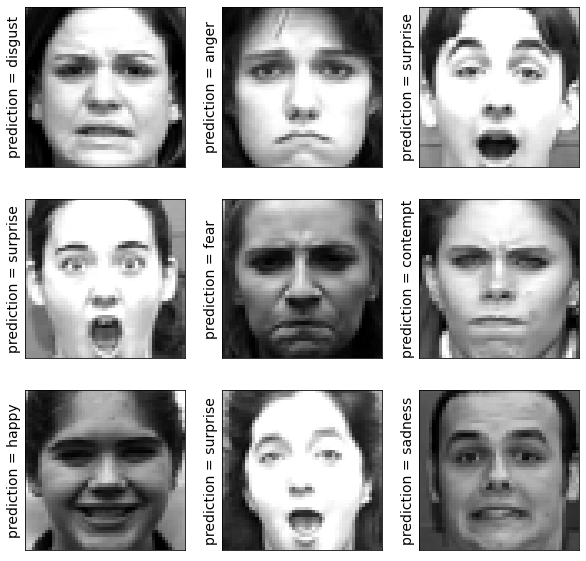

In [38]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print("Test img shape-->", test_image.shape)

print("model predict for test img-->", model.predict(test_image))
print("Predicted classes of test img-->",model.predict_classes(test_image))
print("Correlate with ids-->",y_test[0:1])

#res = model.predict_classes(X_test[9:18])   #For complete ck+ dataset
res = model.predict_classes(X_test[0:9])
plt.figure(figsize=(10, 10))

for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i],cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %s' % getLabel(res[i]), fontsize=14)
# show the plot
plt.show()

<Figure size 432x288 with 0 Axes>

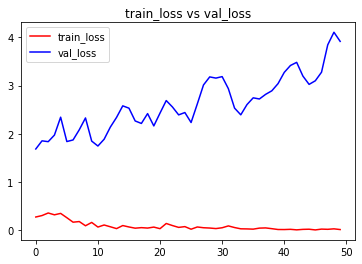

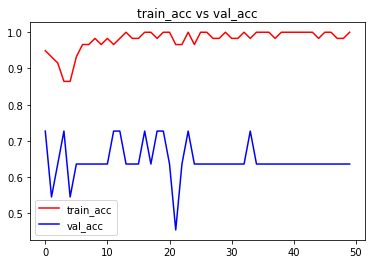

<Figure size 432x288 with 0 Axes>

In [42]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
#train_acc=hist.history['acc']
train_acc=hist.history['accuracy']
#val_acc=hist.history['val_acc']
val_acc=hist.history['val_accuracy']   # acc is renamed in TensorFlow 2.0

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()